# Workshop de Machine Learning

Bienvenidos al notebook del Workshop de Machine Learning. Es acá donde vamos a llevar a cabo la mayor parte de las actividades como también presentaciones breves de distintos conceptos.

Empecemos importando un par de paquetes que nos interesan utilizar:

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

- `numpy` es una librería para computación científica.
- `matplotlib` es una librería para visualización de datos.

# Comencemos

## ¿Qué es Machine Learning, o Aprendizaje Automático?
Es una rama de la inteligencia artificial que tiene como objetivo el desarrollo de técnicas que permitar a las computadoras "aprender". De forma más concreta, se trata de crear programas capaces de generalizar comportamientos a partir de una información suministrada en forma de ejemplos. Es, por lo tanto, un proceso de inducción del conocimiento. En muchas ocasiones el campo de actuación del aprendizaje automático se solapa con el de la estadística computacional, ya que las dos disciplinas se basan en el análisis de datos. ([Source](https://es.wikipedia.org/wiki/Aprendizaje_autom%C3%A1tico))

**Dicho de una forma un poco más sencilla**: el aprendizaje automático busca ** generalizar ** situaciones para poder descubrir nuevo conocimiento que puede venir en la forma de clasificación, estimación o inclusive formas de visualizar datos. Esta generalización se logra con la combinación de modelos matemáticos, estadísticos, y la computación. Dicho de otra forma, podríamos decir que es probabilidad y estadística aplicada a la computación.

Si quieren conocer un poco más la motivación por detrás les recomiendo este video de Pedro Domingos, ["The Master Algorithm"](https://www.youtube.com/watch?v=B8J4uefCQMc).

El aprendizaje automático se divide en dos grandes ramas: el **aprendizaje supervisado** y el **aprendizaje no supervisado**. En este workshop vamos a ver principalmente el aprendizaje supervisado.

---

## ¿Qué es el aprendizaje supervisado?

El aprendizaje supervisado consiste en alimentar a un algoritmo de aprendizaje automático con un conocimiento previo que, partiendo de éste, pueda clasificar o estimar (dependiendo de si la variable a predecir es continua o categórica) nuevos casos desconocidos.

Usemos un ejemplo para explicar esto.

Supongamos que queremos decidir si una fruta es una naranja o una manzana. Nosotros lo sabemos mirándolas, pero las computadoras no. Sin embargo, tenemos dos mediciones de estas frutas: su peso y su diámetro. Si bien no tengo idea de la verdadera diferencia media entre su peso y diámetro, vamos a hacer de cuenta que las naranjas pesan más y tienen un mayor diámetro que las manzanas porque sino se me caga el ejemplo. Ah, y van a ser números enteros porque pintó (no importa, en serio).

In [3]:
# Estaría bueno que tengamos los mismos valores random para el primer estado.

np.random.seed = 1

# Creemos las manzanas.

naranjas_diametro = np.random.randint(5, 10, (25, 1))
naranjas_peso = np.random.randint(5, 10, (25, 1))

# Creemos las naranjas
manzanas_diametro = np.random.randint(0, 5, (25, 1))
manzanas_peso = np.random.randint(0, 5, (25, 1))

### ¿Qué tenemos ahora?

Tenemos cuatro vectores: dos de naranjas y dos de manzanas. El primer vector de cada fruta es su diámetro, el segundo es su peso. Intenten visualizar eso en un gráfico de dos dimensiones.

Mejor aún, visualicemoslo posta. **Para esto vamos a hacer que los pesos de las frutas sean el eje Y, y el diametro de las frutas el eje X**. Ahora necesitamos dos vectores: el peso de las frutas, y el diámetro de las frutas.

Peso de las frutas: [[9 5 5 5 9 9 9 7 9 9 9 8 8 9 9 9 9 9 7 8 8 9 7 5 7 2 1 4 3 2 0 1 2 2 0 1 0
  0 4 4 2 4 1 0 3 2 2 0 3 2]]
Diametro de las frutas: [[6 5 5 6 7 9 5 9 6 6 8 5 5 5 6 7 5 6 8 9 6 6 6 7 8 0 0 1 2 4 1 0 0 1 0 4 4
  2 0 2 3 1 4 2 1 3 2 1 1 2]]


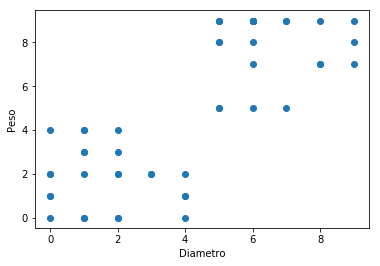

In [4]:
# Armamos el vector del peso de las frutas.
frutas_peso = np.concatenate([naranjas_peso, manzanas_peso])
print("Peso de las frutas: {}".format(frutas_peso.T))

# Traspongo los vectores para que quede bonito, nada más.

# Armamos el vector del diámetro de las frutas.
frutas_diametro = np.concatenate([naranjas_diametro, manzanas_diametro])
print("Diametro de las frutas: {}".format(frutas_diametro.T))

# Visualicemoslo.
plt.scatter(frutas_diametro, frutas_peso)
plt.xlabel("Diametro")
plt.ylabel("Peso")

Buenísimo, podemos visualizar todas las frutas que tenemos, pero no tenemos ni idea de cual es cual. Como sabemos que las naranjas son más grandes y pesan más que las manzanas, podemos inferir sin mucho problema que los 10 puntos con mayores valores (X, Y) son las naranjas. ¿Pero cómo sabe esto la computadora?

Supongamos que queremos crear una función lineal, una recta que defina cuales son manzanas y cuales son naranjas.
**¿Cual es la función que mejor representa esta diferencia entre manzanas y naranjas?** **_No lo sabemos_**.

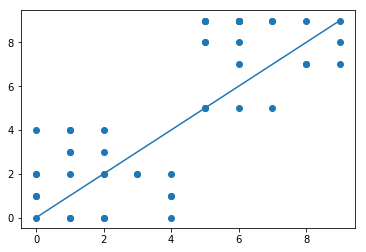

In [5]:
# ¿Puede ser esta?

plt.scatter(frutas_diametro, frutas_peso)
plt.plot(np.arange(0, 10))

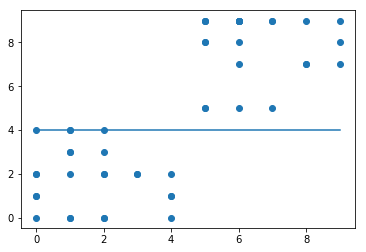

In [6]:
# Parece que esa no es.
# ¿Y esta?

plt.scatter(frutas_diametro, frutas_peso)
plt.plot(np.zeros((10, 1)) + 4)

Tampoco me dice muy bien qué es qué, pero nosotros como personas recontra inteligentes que somos ya nos estamos imaginando que una función algo así como **f(x) = -x + 10** nos va a separar bien los casos. Veamoslo.

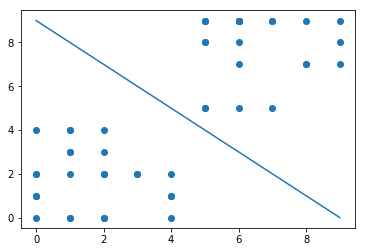

In [7]:
plt.scatter(frutas_diametro, frutas_peso)
# Aplicamos nuestra función a los números del 1 al 10.
resultados = [(-x + 10) for x in range(1, 11)]
plt.plot(resultados)

## ¡Ahí está!

No parece ser la mejor o "más óptima", pero nos sirve para nuestro caso. Se ve que esta función ya cumple bastante bien con lo que queremos y expresa mi punto. Veamos qué punto pertenece a qué fruta, por las dudas.

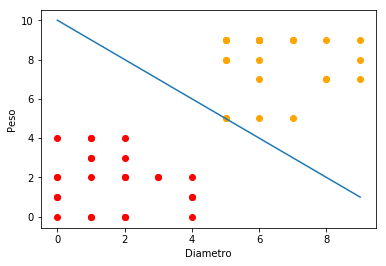

In [8]:
# Las naranjas son... naranjas
plt.scatter(naranjas_diametro, naranjas_peso, color='orange')
# Las manzanas son rojas.
plt.scatter(manzanas_diametro, manzanas_peso, color='red')
plt.plot(np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]))
plt.xlabel("Diametro")
plt.ylabel("Peso")

## ¿Para qué hicimos todos esto?

Para mostrar el problema que tenemos en frente nuestro. Tenemos **casos**, o frutas en este ejemplo, que queremos **clasificar** como manzanas o naranjas de forma **automatizada**, nosotros podemos tranquilamente porque estamos en dos dimensiones, inclusive podríamos en tres, pero ¿qué hacemos en **cuatro dimensiones**?¿qué hacemos en **diez mil dimensiones**? Ya no podemos visualizar estos datos, sin embargo gracias a la probabilidad y estadística (y gracias a su papá: el análisis matemático y su mamá, abuela, abuelo, y tataraabuelo: el algebra lineal) podemos clasificar casos en N dimensiones.

## Entonces, ¿qué queremos hacer?

Dada una entrada previamente clasificada (es decir, si son frutas que sabemos si son naranjas o manzanas), queremos optimizar parámetros que definimos (generalmente de forma aleatoria) para que se acerquen lo más posible a la realidad: que **aprenda a representar el patrón que le alimentamos al algoritmo de aprendizaje automático**. [Acá es donde la cosa se empieza a poner matemática](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

Descubramos el potencial del aprendizaje automático junto con [scikit-learn](http://scikit-learn.org/). Vamos a entrenar un modelo conocido como regresión logística, que se usa para predecir variables categoricas (es decir que tiene un valor alfanumérico).

- Primero necesitamos ejemplos, necesitamos que las manzanas y naranjas que definimos anteriormente pasen a ser clasificadas. Vamos a agregar un nuevo vector que ya los clasifique.
- Para poder alimentar al algoritmo vamos a necesitar juntar todo en una única matriz de todos los casos de entrenamiento. Vamos a crear un **set de entrenamiento**, que es el que se usa para hacer que nuestro algoritmo de aprendizaje automático "aprenda".
- Como nuestro algoritmo solamente maneja valores numéricos, vamos a asignar el número **0** para las **naranjas** y el **1** para definir las **manzanas**.

In [9]:
# Creamos los vectores con las clasificaciones para nuestro set de entrenamiento.

manzanas_clasificadas = np.full((25, 1), 1)

naranjas_clasificadas = np.zeros((25, 1))

# Fijemonos su tamaño.

print("Tamaño del vector de manzanas clasificadas: {}".format(manzanas_clasificadas.shape))
print("Tamaño del vector de naranjas clasificadas: {}".format(naranjas_clasificadas.shape))

Tamaño del vector de manzanas clasificadas: (25, 1)
Tamaño del vector de naranjas clasificadas: (25, 1)


** Nos indica que tenemos un vector con 10 valores, o dicho de otra forma una matriz de 10 filas y 1 sola columna, o 10x1. **

Ahora podemos arrancar con un lenguaje más técnico.

- El **peso** y el **diametro** de las **frutas** son conocidas como **"features"** o características del problema a modelar.
- El **valor** que define a una fruta ("manzana", o 1 y "naranja", o 0) es conocido como una **label** o etiqueta, que consiste en la clasificación de este caso.
- El algoritmo se entrena pasandole varios casos de entrenamiento o ejemplos de entrenamiento (correspondientes a **cada fila de una única matriz**) donde cada caso de entrenamiento está clasificado con su **label**.
- Véase esta tabla:

| Diametro        | Peso           | Label  |
| ------------- |:-------------:| -----:|
|   1    |      1         | 1 |
|   2    | 3      |   1 |
|   6    | 9      |    0 |

Recordemos que el 0 representa a las **naranjas** y el 1 representa a las **manzanas**.

In [10]:
# Creemos nuestra matriz, que es muy parecida a esta tabla pero con 20 valores de entrenamiento!

# Primero juntemos nuestra etiquetas o labels en un vector de 20x1.
labels = np.concatenate([naranjas_clasificadas, manzanas_clasificadas])
# Y creamos nuestra matriz! Nuestro training set!
training_set = np.column_stack([frutas_diametro, frutas_peso, labels])
print(training_set.shape)

(50, 3)


¡Ahora tenemos una matriz de 20x3! Donde la primer columna es el diametro de las frutas, el segundo el peso, y el último su correcta clasificación.

No les voy a mentir, esto en realidad es lo que recibiríamos normalmente como un .csv o similares, en realidad necesitamos **las features y las labels por separado**, hagamos eso.

In [11]:
# Me hago una matriz de 20x1 con las features (diametro y peso) y sus valores.
features = training_set[:, 0:2]

# Y un vector con la correcta clasificación de cada caso, esto está ordenado 
# para matchear sus respectivos training examples.
labels = training_set[:, 2]

Ya esperamos mucho. Entrenemos al algoritmo y veamos qué resultado nos da.

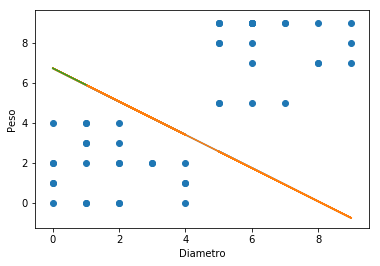

In [12]:
# Para esto vamos a usar la implementación del modelo de regresión logística provisto por la librería scikit-learn.
from sklearn import linear_model
# Instanciamos el modelo y lo entremamos con el método fit()
model = linear_model.LogisticRegression()
model.fit(features, labels)

# Recopilo los parámetros estimados
b = model.intercept_
w1, w2 = model.coef_[0]

# Muestro los resultados (http://www.okaythenwhat.com/0011)
plt.plot(training_set, (-b-w1*training_set)/w2)
plt.scatter(frutas_diametro, frutas_peso)
plt.xlabel("Diametro")
plt.ylabel("Peso")

## ¡Ahí está! (x2)

Si bien hay un caso del set de entrenamiento que puede estar mal categorizado, podemos probar con datos sin categorizar para saber si está todo en orden.

Acertamos 9 de 10 casos de prueba, es decir que tenemos un 90.0% de precisión.


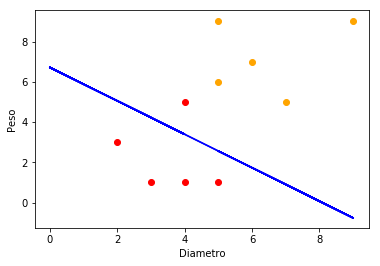

In [13]:
# Creemos un vector un poquito diferente, uno de valores de punto flotante.

# Vamos a decir que los primeros 5 elementos del vector son manzanas, y los últimos 5 naranjas.
frutas_sin_clasificar = np.array([[3, 1], [4, 1], [5, 1], [2, 3], [4, 5], [6, 7], [5, 6], [5, 9], [7, 5], [9, 9]])
clasificacion_correcta = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
plt.scatter(frutas_sin_clasificar[:5, 0], frutas_sin_clasificar[:5, 1], color='red')
plt.scatter(frutas_sin_clasificar[5:10, 0], frutas_sin_clasificar[5:10, 1], color='orange')
plt.plot(training_set, (-b-w1*training_set)/w2, color='blue')
plt.xlabel("Diametro")
plt.ylabel("Peso")

predicciones = model.predict(frutas_sin_clasificar) # model.predict() trata de clasificar nuevos casos
aciertos = np.sum(predicciones == clasificacion_correcta)
total_casos = frutas_sin_clasificar.shape[0]
precision = (aciertos / total_casos) * 100
print("Acertamos {} de {} casos de prueba, es decir que tenemos un {}% de precisión.".format(aciertos, total_casos, precision))

Diría que nos fue bastante bien para usar un algoritmo sacado de una caja al que no le dimos ningún tipo de contexto y se comportó casi como una caja negra.

## Basta de ejemplos, a codear.

En esta parte es donde ustedes es lucen. Si bien hay cosas que no vimos (por ejemplo: cómo funciona esta famosa regresión logística y otros algoritmos de machine learning), ya con entender el formato de los datos podemos entrenar un algoritmo de aprendizaje automático (supervisado en este caso), asumiendo que ya los tenemos, ¡y en este caso los tenmeos!

Vamos a usar uno de los datasets de ejemplo de scikit learn, que es mucho más copado que clasificar frutas, vamos a **clasificar dígitos escritos a mano**.

- Vamos a tener imágenes de 8x8 pixeles que van a ser números manuscritos del 1 al 10.
- Para poder descomponer esta imagen en algo que podamos alimentar a un algoritmo de aprendizaje automático, vamos a tener que tener los 64 pixeles separados en **1 feature cada uno**, es decir que tenemos 1797 ejemplos con 64 características o features cada uno.

En la próxima ya queda establecido, o como dice el gran Mati: ya está bien masticado el dataset, lo que hay que hacer es implementar una solución de aprendizaje automático que consuma estos datos y pueda clasificar las imágenes correctamente.

In [23]:
# Carguemos nuestro set de datos

from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
targets = digits.target
# Descomenten las próximas líneas si quieren ver ejemplos de las imágenes.
#plt.gray()
#plt.matshow(digits.images[0])
#plt.matshow(digits.images[1])
#plt.matshow(digits.images[2])
# Importamos un helper de scikit para dividir el dataset en dos: uno de entrenamiento y otro para testear.
# Esto va a resultar en un 75% de los casos para entrenamiento y un 25% para probar la precisión.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, targets)
# Importamos un helper de scikit para calcular la precisión. Es aciertos / total de ejemplos.
from sklearn.metrics import accuracy_score

## ¿Qué hay que hacer?

- Tienen que completar la función definida en la próxima celda: `machine_learning(X_train, X_test, y_train, y_test)`, que va a recibir el dataset separado en el set de entrenamiento y el set de prueba de los digitos escritos a mano. Pueden elegir el modelo que se les cante de [acá](http://scikit-learn.org/stable/model_selection.html). Eso es lo bueno de scikit, la interfaz es la misma independientemente del modelo de aprendizaje automático que elijamos. El nombre lo elegí a falta de creatividad.
- Hay que escoger un modelo, instanciarlo, entrenarlo (método `.fit(x, y)`) y clasificar el set de prueba con el método `.predict(x)`.
- Tienen que hacer uso de la función [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) previamente importada e imprimir por standard output el resultado (les devuelve un float que es el ratio de casos acertados por sobre el total).
- La función tiene que devolver un vector con todos los casos del set de prueba clasificados (no importa si correctamente o no, no tiene que explotar, después vamos a empezar a ver las problemáticas del día  día).

In [25]:
# La función que tienen que implementar
def machine_learning(X_train, X_test, y_train, y_test):
    raise Exception("Not implemented")

In [32]:
predictions = machine_learning(X_train, X_test, y_train, y_test).shape[0] == 450

# Un chequeo muy pavo de que el vector que devuelven tiene el mismo tamaño
assert(predictions.shape[0] == 450)

for true_value, predicted_value in zip(y_test, predictions):
    print("Para la imagen cuyo valor verdadero es {} se predijo que vale {}.".format(true_value, predicted_value))

Exception: Not implemented